# CHAPTER 22: Variance-Reduced Methods I: Uniform Sampling

### This code runs simulations for Example 1 and generates figure 2 from Chapter 22: Variance-Reduced Methods I: Uniform Sampling (vol I)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

Required Libraries:

1. numpy
2. matplotlib

Required Functions:

1. generate_logistic
2. logistic_minimizer

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from generate_logistic import generate_logistic
from logistic_minimizer import logistic_minimizer

## Example 22.1 (Illustrating performance of SAGA and SVRG)

We illustrate the convergence performance of the SAGA and SVRG variance-reduction techniques by numerical simulations. We consider the following regularized logistic empirical risk problem:

$$
\min_{w\in\mathbb{R}^{M}}\quad \left\{P(w) \, \mathrm{defined\,as}\, \rho\|w\|^2+ \frac{1}{N}\sum_{m=0}^{N-1}\ln\left(1+e^{-\gamma(m) h_m^{\sf T} w}\right)\right\} \tag{22.60}
$$

where $h_m\!\in\!\mathbb{R}^M\!$ and  $\gamma(m)\!\!\in\!\! \{\pm1\}$. In all  experiments, we set $\rho=0.5$ and $M=25$. We generate $N=400$ random data pairs $\{\gamma(m),h_m\}$ according to a logistic model. First, a random parameter model $w^a\in\mathbb{R}^{M}$ is selected, and a random collection of  vectors $\{h_m\}$ are generated with zero-mean unit-variance Gaussian entries. Then, for each $h_m$, the label $\gamma(m)$ is set to either $+1$ or $-1$ according to the following construction:

$$
\gamma(m) = 
\begin{cases}
+1 & \text{if } \left(\frac{1}{1+e^{-h_m^{\sf T} w^a}}\right) \geq 0.5 \\
-1 & \text{otherwise}
\end{cases} \tag{22.61}
$$

A total of $K=40$ epochs are run over the data using $\mu=0.001$.
 
Figure $22.2$ compares the performance of the SAGA and SVRG recursions   with the traditional stochastic gradient algorithm ($16.47$).  The plot in the top row compares the learning curves in normalized log scale. Observe  how the learning curves for SAGA and SVRG continue to decrease while the learning curve for stochastic gradient tends toward a steady-state level. The learning curves shown in the figure reflect the values of the risk function at the start of each epoch, namely, the successive values $P(w_{-1}^{k})$. The plots in the lower row of the figure show the limiting weight iterates that are obtained by SAGA, SVRG,  the stochastic gradient recursion ($16.47$), and also the  logistic gradient-descent implementation ($12.30$); the latter employs the full gradient vector of the risk function. Observe that, for the number of epochs used, the weight iterate by the SAGA and SVRG recursions are already close to the weight iterate attained by the gradient-descent implementation. In contrast, the weight iterate by the stochastic gradient implementation (the third plot) still needs additional iterations to converge, as is evident from the encircled weight values.

wait....generating data
wait....processing data


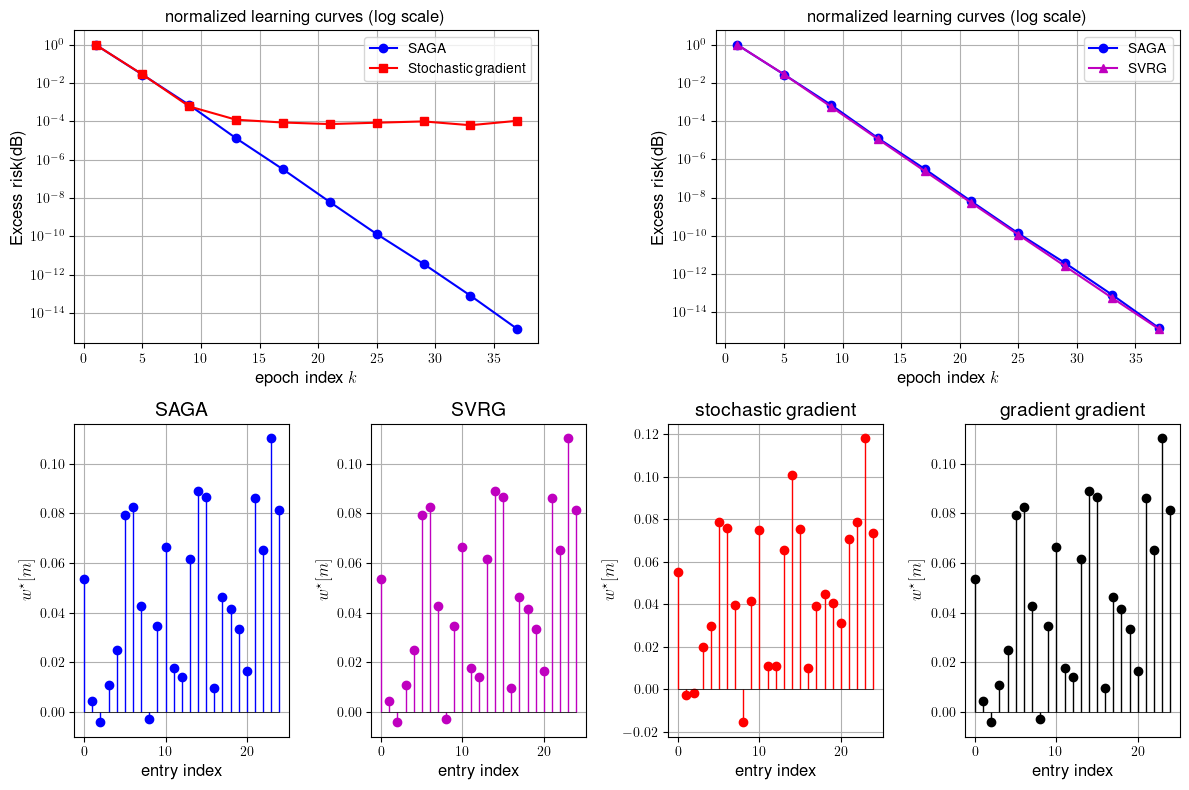

In [17]:
#################################################################################
# Runs EXAMPLE 1 (Illustrating performance of SAGA and SVRG)
# generates figure 2
#################################################################################

# l2-regularized empirical logistic risk
# P(w) = rho\|w\|^2 + (1/N)sum_{n=0}^{N-1} ln(1+exp(-gamma(m) h_m' w))

rho = 0.5   # regularization parameter
mu = 0.001  # step-size for stochastic gradient

M = 25   # feature size
N = 400  # number of data points
K = 40   # number of epochs

print('wait....generating data');

# Generating data
zo = np.random.rand(M).reshape(-1,1) # underlying parameter model for logistic data
p, gamma_vec, H = generate_logistic(N,zo,0) # logistic model with zero offset
ws, Ps, thetas = logistic_minimizer(rho, gamma_vec, H,0) # ignore offset

w = np.random.randn(M).reshape(-1,1) # initial condition for SAGA weight iterate
wsg = w.copy()   # initial condition for standard stochastic gradient (SG)
wsvrg = w.copy() # initial condition for SVRG

Phi = np.zeros((M,N)) # memory variables for SAGA
b=0

for m in range(N):
    h_m = H[:, m].reshape(-1, 1)
    gamma_m = gamma_vec[m]
    a = 1 + np.exp(gamma_m * np.dot(h_m.T, Phi[:, m].reshape(-1,1)))
    s = 2 * rho * Phi[:, m].reshape(-1, 1) - gamma_m * h_m / a  # Adding gradients of logistic loss
    b = b + s

b = b / N  # Initialization of vector b for SAGA

P = np.zeros(K).reshape(-1,1)     # learning curve over epochs for SAGA
Psg = np.zeros(K).reshape(-1,1)   # learning curve for SG
Psvrg = np.zeros(K).reshape(-1,1) # learning curve for SVRG
Pavrg = np.zeros(K).reshape(-1,1) # learning curve for AVRG

print('wait....processing data')

for k in range(K): # iterating over runs
    phi_svrg = wsvrg.copy() # initializing b vector for SVRG
    bsvrg=0    
    for m in range(N) :
        h_m = H[:,m].reshape(-1,1)
        gamma_m = gamma_vec[m]
        _as = ( 1 + np.exp(gamma_m * np.dot(h_m.T, wsvrg)) )[0,0]
        ss = 2 * rho * wsvrg - gamma_m * h_m / _as # adding gradients of logistic loss
        bsvrg = bsvrg + ss
        
    bsvrg = bsvrg/N #initialization of vector b for SVRG
       
    for m in range(N) :  # evaluating empirical risk function at start of each epoch
        h_m = H[:,m].reshape(-1,1) # feature vector
        gamma_m = gamma_vec[m] # label

        a = ( 1 + np.exp(-gamma_m * np.dot(h_m.T, w)) )[0,0]
        P[k] = P[k]  + np.log(a) # SAGA

        asgd = ( 1 + np.exp(-gamma_m * np.dot(h_m.T, wsg)) )[0,0] # SG (stochastic gradient)
        Psg[k] = Psg[k] + np.log(asgd)

        asvrg = ( 1 + np.exp(-gamma_m * np.dot(h_m.T, wsvrg)) )[0,0] # SVRG
        Psvrg[k] = Psvrg[k] + np.log(asvrg)

    P[k] = (1/N) * P[k] # SAGA
    P[k] = P[k] + rho * np.linalg.norm(w,2)**2 # risk value at start of epoch k

    Psg[k] = (1/N)*Psg[k] # SG
    Psg[k] = Psg[k] + rho*np.linalg.norm(wsg,2)**2

    Psvrg[k] = (1/N)*Psvrg[k] # SVRG
    Psvrg[k] = Psvrg[k] + rho*np.linalg.norm(wsvrg,2)**2
    
    for n in range(N) : # iterating over data in each epoch
        u = np.random.randint(N) # uniform sampling
        h_u = H[:,u].reshape(-1,1) # feature vector
        gamma_u = gamma_vec[u] # label
        
        ## SAGA
        phi_u = Phi[:,u].reshape(-1,1) # memory variable
        aphi = ( 1 + np.exp(gamma_u * np.dot(h_u.T,phi_u)) )[0,0]
        sphi = 2 * rho * phi_u - gamma_u * h_u / aphi # gradient at phi

        aw = ( 1 + np.exp(gamma_u * np.dot(h_u.T,w)) )[0,0]
        sw = 2 * rho * w - gamma_u * h_u / aw # gradient at w

        w = w - mu*(sw-sphi + b) # updated w (SAGA)
        Phi[:,u] = w[:,0]

        aupdated = ( 1 + np.exp(gamma_u * np.dot(h_u.T,w)) )[0,0]
        supdated = 2 * rho * w - gamma_u * h_u / aupdated # gradient at phi

        b = b + (1/N) * (supdated - sphi)
       
        ## SVRG
        aphi_svrg = ( 1 + np.exp(gamma_u * np.dot(h_u.T,phi_svrg)) )[0,0]
        sphi_svrg = 2 * rho * phi_svrg - gamma_u * h_u / aphi_svrg # gradient at phi

        aw_svrg = ( 1 + np.exp(gamma_u * np.dot(h_u.T, wsvrg)) )[0,0]
        sw_svrg = 2 * rho * wsvrg - gamma_u * h_u / aw_svrg # gradient at w

        wsvrg = wsvrg - mu * (sw_svrg - sphi_svrg + bsvrg) # updated w (SVRG)

        ## Stochastic Gradient for comparison purposes
        asg = ( 1 + np.exp(gamma_u* np.dot(h_u.T,wsg)) )[0,0]
        ssg = 2 * rho * wsg - gamma_u * h_u / asg # gradient at w

        wsg = wsg - mu*ssg # stochastic gradient; uniform sampling

        
## figure 2 (comparing SVRG and SAGA)
plt.rcParams.update({
"text.usetex": True,
"font.family": "sans-serif",
"font.sans-serif": "Helvetica",
}) 
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.semilogy(range(1, K + 1, 4), np.abs(P[0::4] - Ps) / np.max(P - Ps), '-ob', range(1, K + 1, 4), np.abs(Psg[0::4] - Ps) / np.max(Psg - Ps), '-sr')
plt.xlabel('epoch index $k$', fontsize=12)
plt.ylabel('Excess risk(dB)', fontsize=12)
plt.title('normalized learning curves (log scale)', fontsize=12)
plt.legend(['SAGA', 'Stochastic gradient'])
plt.grid()

plt.subplot(222)
plt.semilogy(range(1, K + 1, 4), np.abs(P[0::4] - Ps) / np.max(P - Ps), '-ob', range(1, K + 1, 4), np.abs(Psvrg[0::4] - Ps) / np.max(Psvrg - Ps), '-^m')
plt.xlabel('epoch index $k$', fontsize=12)
plt.ylabel('Excess risk(dB)', fontsize=12)
plt.title('normalized learning curves (log scale)', fontsize=12)
plt.legend(['SAGA', 'SVRG'])
plt.grid()


plt.subplot(245)
markerline, stemlines, baseline = plt.stem(w, markerfmt='bo', linefmt='b', basefmt='k')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5)
plt.xlabel('entry index', fontsize = 12)
plt.ylabel('$$w^{\star}[m]$$', fontsize = 12)
plt.title('SAGA', fontsize = 14)
plt.grid()

plt.subplot(246)
markerline, stemlines, baseline = plt.stem(wsvrg, markerfmt='mo', linefmt='m', basefmt='k')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5)
plt.xlabel('entry index', fontsize = 12)
plt.ylabel('$$w^{\star}[m]$$', fontsize = 12)
plt.title('SVRG', fontsize = 14)
plt.grid()

plt.subplot(247)
markerline, stemlines, baseline = plt.stem(wsg, markerfmt='ro', linefmt='r', basefmt='k')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5)
plt.xlabel('entry index', fontsize = 12)
plt.ylabel('$$w^{\star}[m]$$', fontsize = 12)
plt.title('stochastic gradient', fontsize = 14)
plt.grid()

plt.subplot(248)
markerline, stemlines, baseline = plt.stem(ws, markerfmt='ko', linefmt='k', basefmt='k')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5)
plt.xlabel('entry index', fontsize = 12)
plt.ylabel('$$w^{\star}[m]$$', fontsize = 12)
plt.title('gradient gradient', fontsize = 14)
plt.grid()

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

**Figure 22.2** The top plot shows the learning curves for the SAGA recursion ($22.33$) and the stochastic gradient recursion ($16.47$) in normalized log scale. The  bottom row plots the limiting weight iterates that are obtained by the SAGA recursion ($22.33$),  the stochastic gradient recursion ($16.47$), and also the logistic gradient-descent implementation ($12.30$). 